In [8]:
from __future__ import print_function
__author__= 'dhi211'

import pylab as pl
# this package sets up pretty plots
import seaborn 
from scipy.optimize import curve_fit, minimize
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

mymean = 100
df = mymean

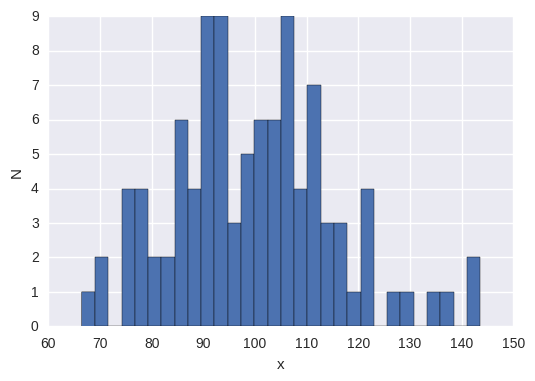

In [10]:
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [11]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.70, standard deviation: 15.84


In [12]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


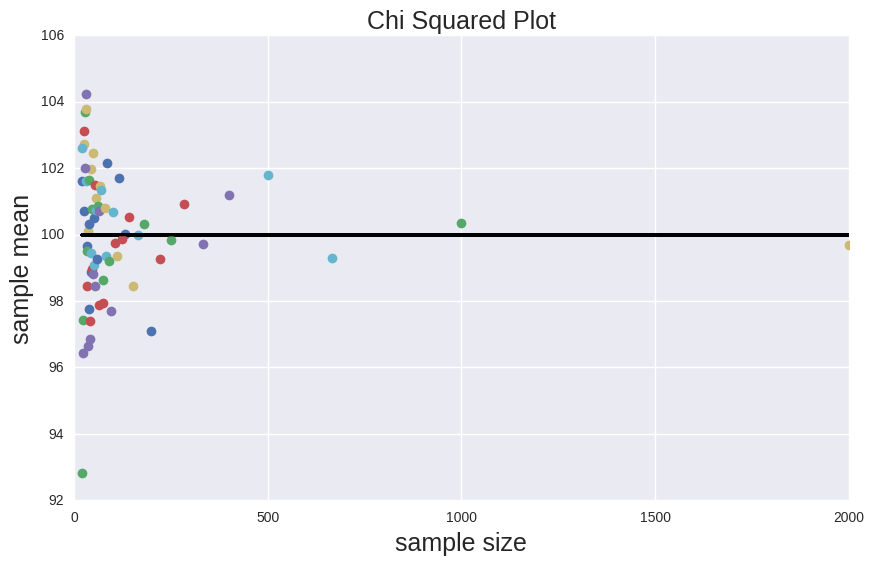

In [13]:
df = mymean
md['chisq'] = {} 


#np.random.chisquare?
#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi Squared Plot', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

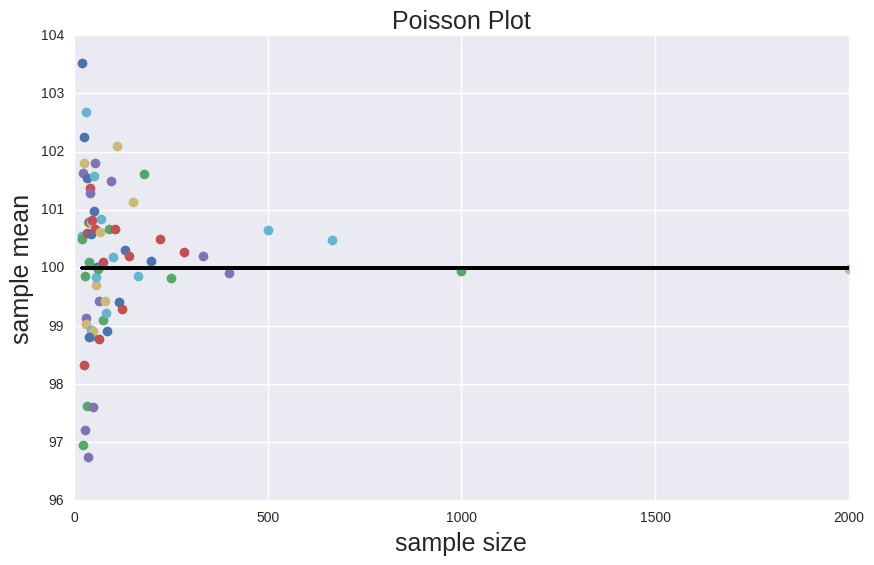

In [14]:
md['pois'] = {} 

lam = mymean

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson Plot', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

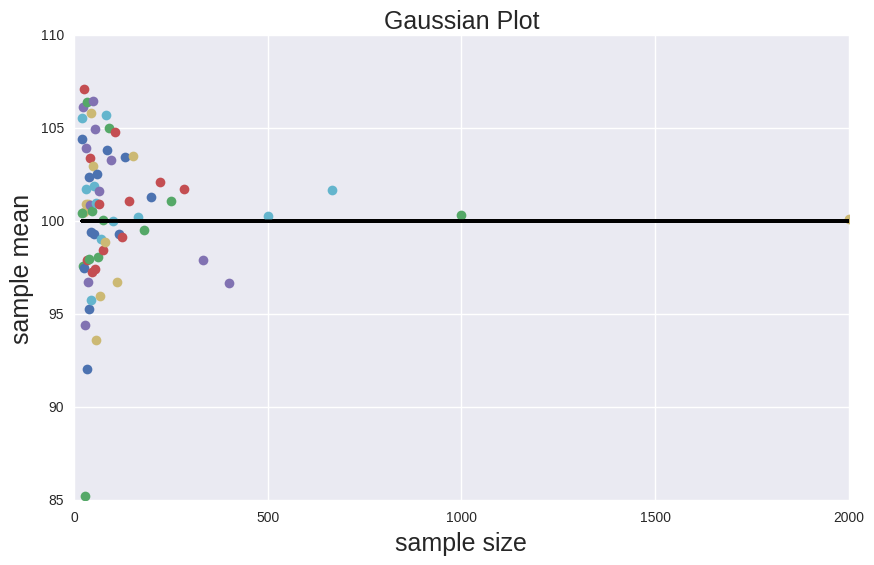

In [15]:
df = mymean
md['gaus'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['gaus'][n] = np.random.normal(df, 30, size = n)
    
# save the means for plotting later    

md['gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Gaussian Plot', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

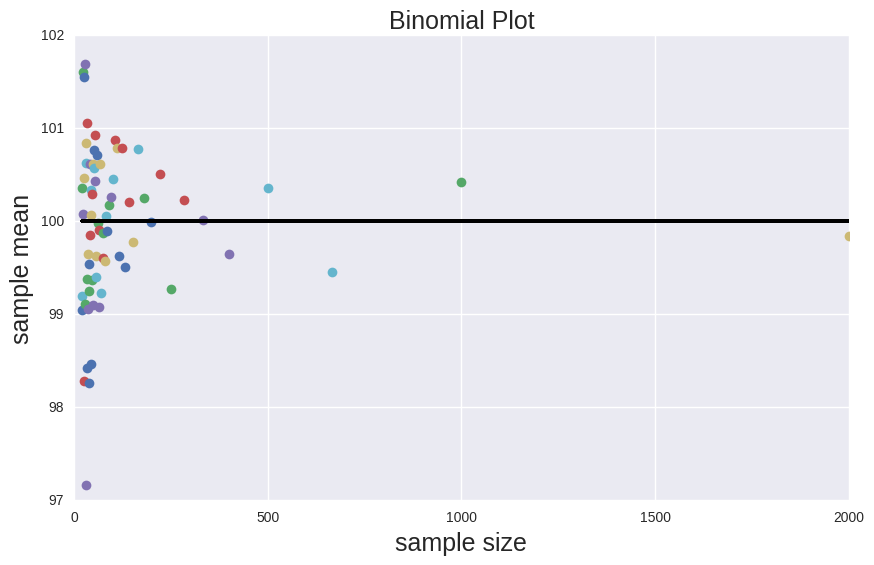

In [16]:
df = mymean
md['binomial'] = {} 

for n in mysize:
    md['binomial'][n] = np.random.binomial(200, .5, size = n)
    #>>> n, p = 10, .5  # number of trials, probability of each trial
    #>>> s = np.random.binomial(n, p, 1000)
    # result of flipping a coin 10 times, tested 1000 times.
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial Plot', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

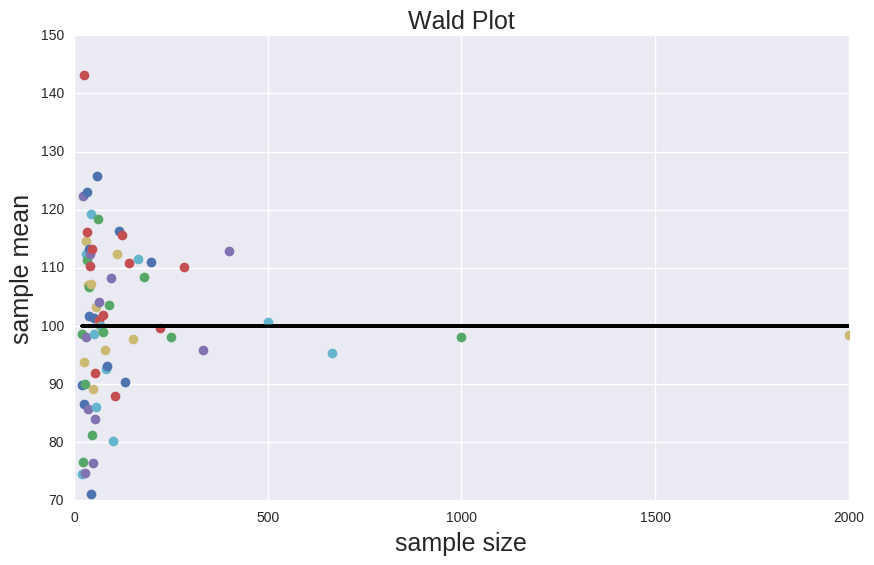

In [17]:
df = mymean
md['wald'] = {} 

#and do it in a for loop. not pythonic, but easily readable



for n in mysize:
    md['wald'][n] = np.random.wald(df, 100, size = n)
    
# save the means for plotting later    

md['wald']['means'] = {}
axwald_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['wald']:
    if not type(nn) == str:
        md['wald']['means'][nn] = md['wald'][nn].mean()
        axwald_mu_n.plot(nn, md['wald']['means'][nn], 'o')
        axwald_mu_n.set_xlabel('sample size', fontsize=18)
        axwald_mu_n.set_ylabel('sample mean', fontsize=18)
        axwald_mu_n.set_title('Wald Plot', fontsize=18)
        axwald_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

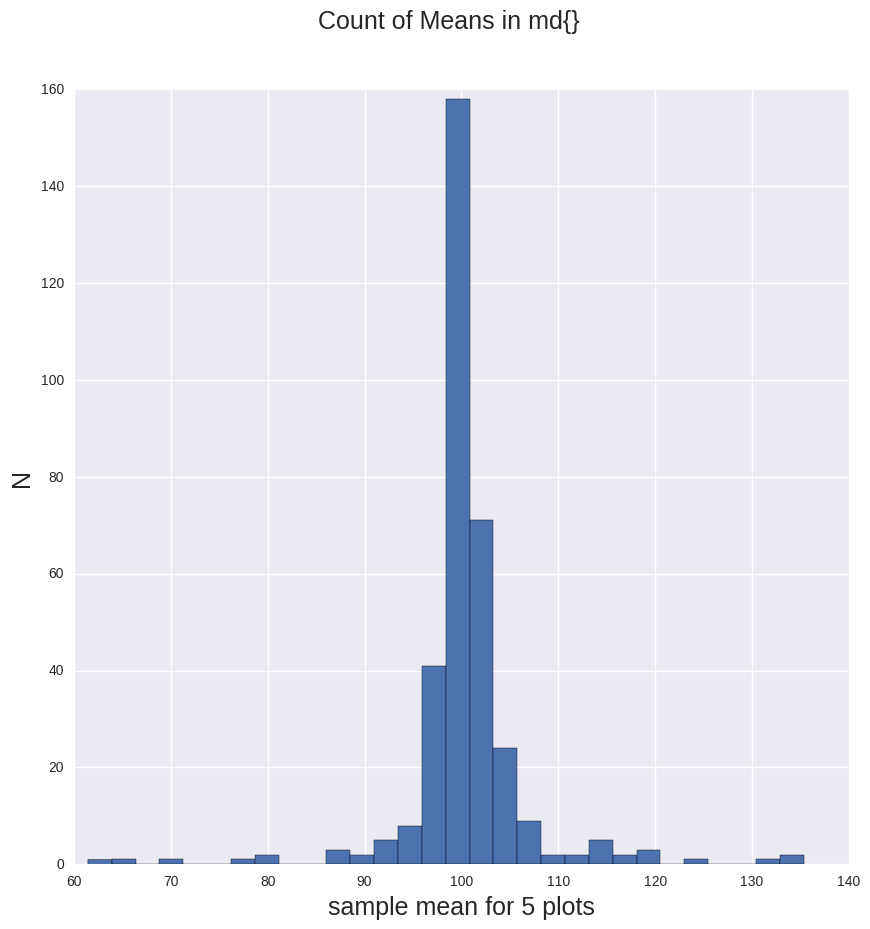

In [94]:
allmeans = list(md['chisq']['means'].values() + md['pois']['means'].values() + md['gaus']['means'].values() + md['binomial']['means'].values() + md['wald']['means'].values())


pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean for 5 plots', fontsize = 18)
pl.suptitle('Count of Means in md{}', fontsize=18)
pl.ylabel('N', fontsize = 18)



In [83]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(allmeans.values.mean(), allmeans.values.std()))

for i in allmeans:
    allmeansVals = allmeans

AttributeError: 'list' object has no attribute 'values'

In [90]:
type(allmeans)
pl.plot?